In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data_rmnch.xlsx')

In [3]:
df

,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,estimate,se,ci_lb,...,iso3,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup,whoreg6,wbincome2024,update,dataset_id
0,Cyprus,1978,WHO Global Health Observatory,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,20.773371,NaN,19.174561,...,CYP,0,1000,0,0,1,European,High income,30 May 2024,rep_gho_rmnch
1,Iran (Islamic Republic of),1982,WHO Global Health Observatory,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,68.784279,NaN,63.160191,...,IRN,0,1000,0,0,1,Eastern Mediterranean,Upper middle income,30 May 2024,rep_gho_rmnch
2,Ghana,1961,WHO Global Health Observatory,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Female,113.473320,NaN,101.174393,...,GHA,0,1000,0,0,0,African,Lower middle income,30 May 2024,rep_gho_rmnch
3,Jordan,1972,WHO Global Health Observatory,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,59.913589,NaN,56.139622,...,JOR,0,1000,0,0,1,Eastern Mediterranean,Lower middle income,30 May 2024,rep_gho_rmnch
4,Jamaica,1976,WHO Global Health Observatory,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,39.717178,NaN,34.537769,...,JAM,0,1000,0,0,1,Americas,Upper middle income,30 May 2024,rep_gho_rmnch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196325,Uzbekistan,2017,WHO Global Health Observatory,NLIS_NU_CA_078,Subclinical vitamin A deficiency in preschool-...,Sex,Male,7.400000,NaN,NaN,...,UZB,0,100,0,0,1,European,Lower middle income,30 May 2024,rep_gho_rmnch
196326,Timor-Leste,2013,WHO Global Health Observatory,NLIS_NU_CA_078,Subclinical vitamin A deficiency in preschool-...,Sex,Male,9.800000,NaN,NaN,...,TLS,0,100,0,0,1,South-East Asia,Lower middle income,30 May 2024,rep_gho_rmnch
196327,Timor-Leste,2013,WHO Global Health Observatory,NLIS_NU_CA_078,Subclinical vitamin A deficiency in preschool-...,Sex,Female,6.100000,NaN,NaN,...,TLS,0,100,0,0,0,South-East Asia,Lower middle income,30 May 2024,rep_gho_rmnch
196328,Armenia,1998,WHO Global Health Observatory,NLIS_NU_CA_078,Subclinical vitamin A deficiency in preschool-...,Sex,Male,0.300000,NaN,NaN,...,ARM,0,100,0,0,1,European,Upper middle income,30 May 2024,rep_gho_rmnch


In [4]:
df.info

<bound method DataFrame.info of                            setting  date                         source  \
0                           Cyprus  1978  WHO Global Health Observatory   
1       Iran (Islamic Republic of)  1982  WHO Global Health Observatory   
2                            Ghana  1961  WHO Global Health Observatory   
3                           Jordan  1972  WHO Global Health Observatory   
4                          Jamaica  1976  WHO Global Health Observatory   
...                            ...   ...                            ...   
196325                  Uzbekistan  2017  WHO Global Health Observatory   
196326                 Timor-Leste  2013  WHO Global Health Observatory   
196327                 Timor-Leste  2013  WHO Global Health Observatory   
196328                     Armenia  1998  WHO Global Health Observatory   
196329                       Nepal  1998  WHO Global Health Observatory   

        indicator_abbr                                     indicato

In [5]:
df.columns

Index(['setting', 'date', 'source', 'indicator_abbr', 'indicator_name',
       'dimension', 'subgroup', 'estimate', 'se', 'ci_lb', 'ci_ub',
       'population', 'flag', 'setting_average', 'iso3', 'favourable_indicator',
       'indicator_scale', 'ordered_dimension', 'subgroup_order',
       'reference_subgroup', 'whoreg6', 'wbincome2024', 'update',
       'dataset_id'],
      dtype='object')

# Data Cleaning

In [7]:
# Check for missing values in the dataset
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(ascending=False)

se                 196330
population         196330
flag                47720
ci_lb                4970
ci_ub                4970
setting_average      4928
wbincome2024         3180
estimate             1092
dtype: int64

In [8]:
# Check the unique values in the 'flag' column
unique_flags = df['flag'].unique()
print("Unique values in 'flag' column:")
print(unique_flags)

Unique values in 'flag' column:
[nan 'Registration National Statistics & WPP2022' 'Not available'
 'Estimate Human Fertility Database' 'Registration Eurostat'
 'Guinea 2018 Demographic and Health Survey'
 'Syrian Arab Republic 2006 Multiple Indicator Cluster Survey'
 'Chad 2019 Multiple Indicator Cluster Survey'
 'Cameroon 2018 Demographic and Health Survey'
 'Jordan 2009 Demographic and Health Survey (Interim)'
 'Jordan 2017-2018 Demographic and Health Survey'
 'Democratic Republic of the Congo 2017-2018 Multiple Indicator Cluster Survey'
 "CÃ´te d'Ivoire 2011-2012 Demographic and Health Survey"
 'Pakistan 2012-2013 Demographic and Health Survey'
 'Niger 2021 EnquÃªte Nationale sur la FÃ©conditÃ© et la MortalitÃ© des Enfants de moins de 5 ans'
 'Congo 2005 Demographic and Health Survey'
 'Afghanistan 2007-2008 National Risk and Vulnerability Assessment'
 'Burkina Faso 2003 Demographic and Health Survey'
 'Democratic Republic of the Congo 2013-2014 Demographic and Health Survey'
 'Ugan

In [9]:
df['flag'] = df['flag'].fillna('Not available')

In [10]:
unique_wbincome2024 = df['wbincome2024'].unique()
print("Unique values in 'wbincome2024' column:")
print(unique_wbincome2024)

Unique values in 'wbincome2024' column:
['High income' 'Upper middle income' 'Lower middle income' 'Low income'
 nan]


In [11]:
df['wbincome2024'] = df['wbincome2024'].fillna('Not available')

In [12]:
df.drop(columns=['se', 'population', 'favourable_indicator', 'ordered_dimension', 'subgroup_order', 'dataset_id', 'update', 'source'], inplace=True)

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191360 entries, 0 to 196287
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   setting             191360 non-null  object 
 1   date                191360 non-null  int64  
 2   indicator_abbr      191360 non-null  object 
 3   indicator_name      191360 non-null  object 
 4   dimension           191360 non-null  object 
 5   subgroup            191360 non-null  object 
 6   estimate            191360 non-null  float64
 7   ci_lb               191360 non-null  float64
 8   ci_ub               191360 non-null  float64
 9   flag                191360 non-null  object 
 10  setting_average     191360 non-null  float64
 11  iso3                191360 non-null  object 
 12  indicator_scale     191360 non-null  int64  
 13  reference_subgroup  191360 non-null  int64  
 14  whoreg6             191360 non-null  object 
 15  wbincome2024        191360 non-null  ob

In [15]:
df.describe()

,date,estimate,ci_lb,ci_ub,setting_average,indicator_scale,reference_subgroup
count,191360.000000,191360.000000,191360.000000,191360.000000,191360.000000,191360.000000,191360.000000
mean,1994.075314,22.880602,18.119127,29.409914,22.913308,324.435619,0.500000
std,14.468252,42.942364,38.967892,47.583697,42.871714,389.386058,0.500001
min,1950.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
25%,1983.000000,2.600000,0.600000,6.000000,2.700000,100.000000,0.000000
50%,1995.000000,7.800000,3.300000,14.300000,8.100000,100.000000,0.500000
75%,2006.000000,20.900000,14.900000,29.479125,20.900000,100.000000,1.000000
max,2021.000000,434.224579,372.464935,503.985352,425.446533,1000.000000,1.000000


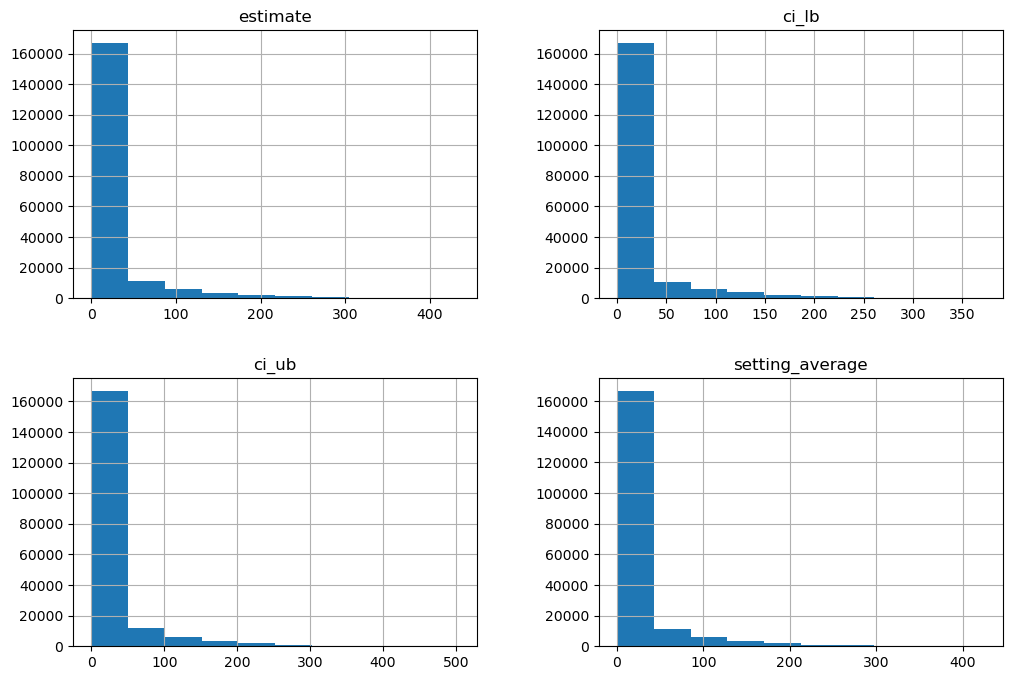

In [16]:
# Histograms
numerical_cols = ['estimate', 'ci_lb', 'ci_ub', 'setting_average']
df[numerical_cols].hist(figsize=(12, 8))
plt.show()

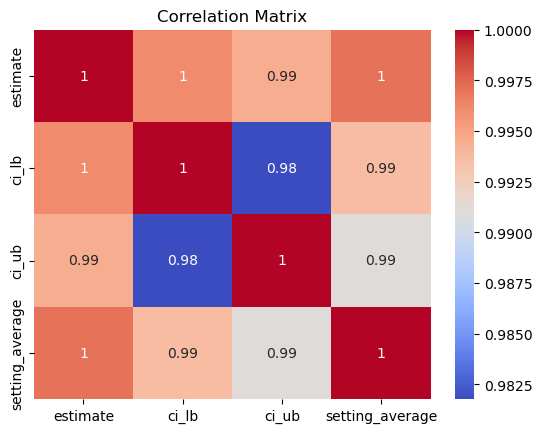

In [17]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

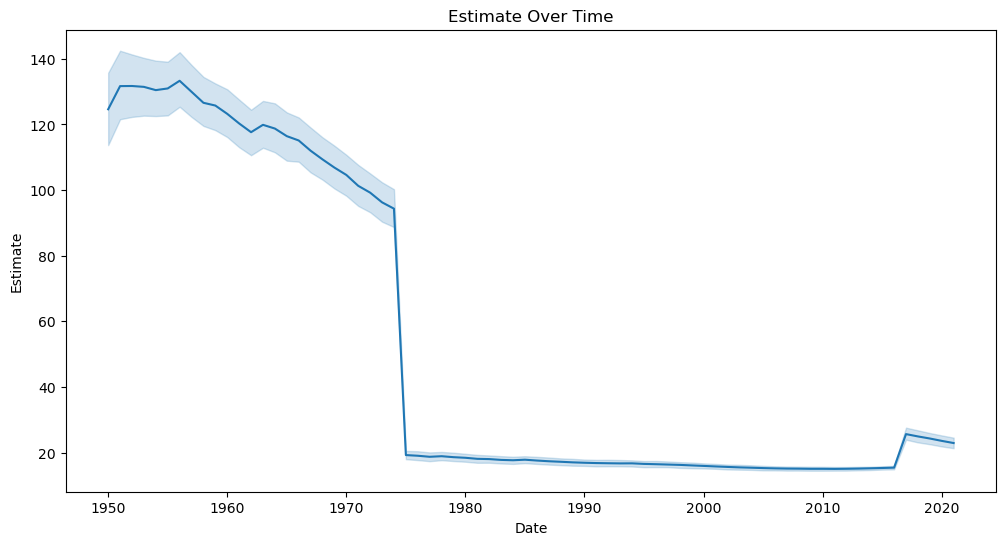

In [18]:
# Time series plot for 'estimate' over 'date'
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='estimate')
plt.title('Estimate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimate')
plt.show()

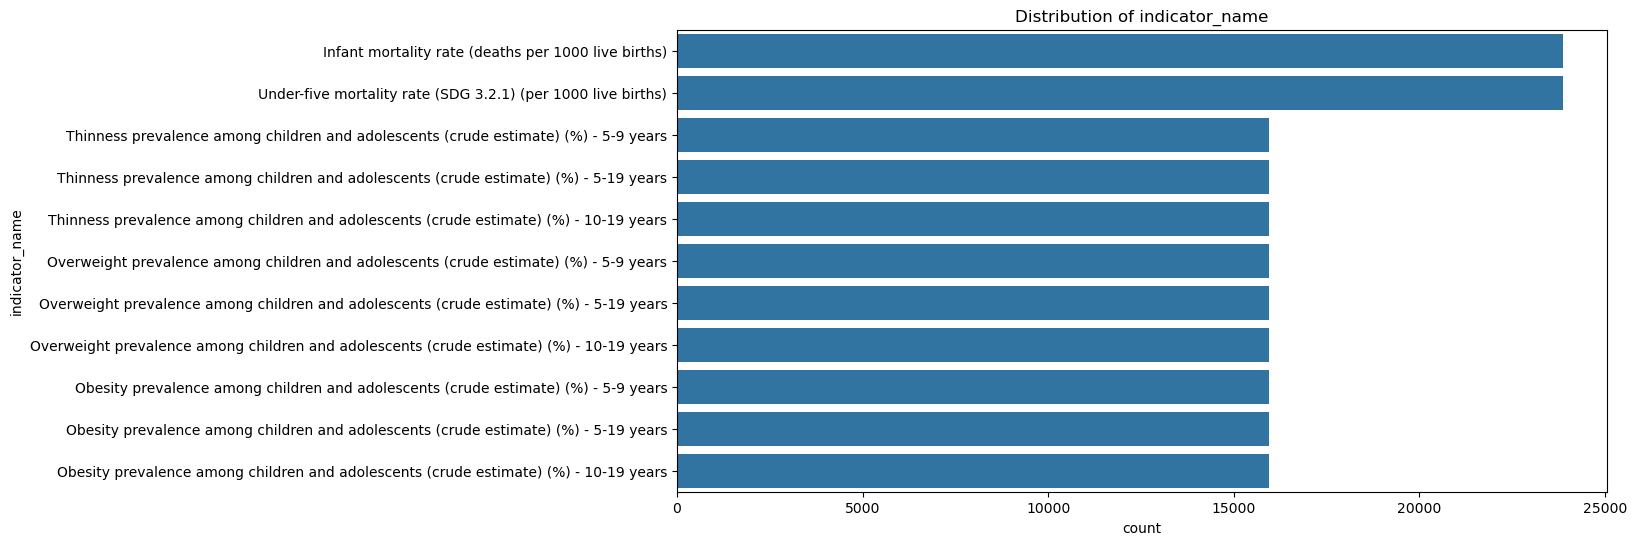

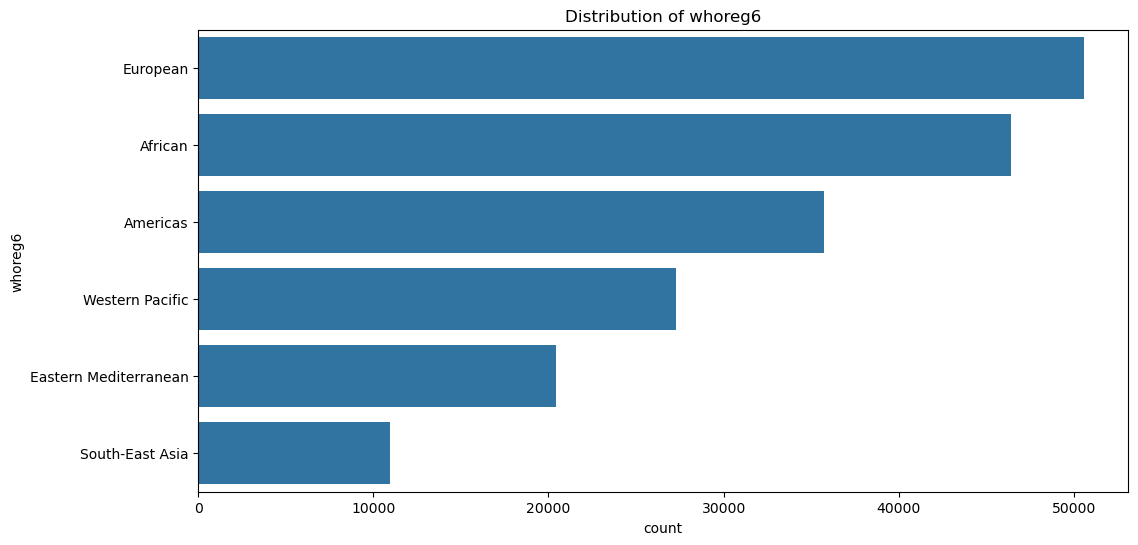

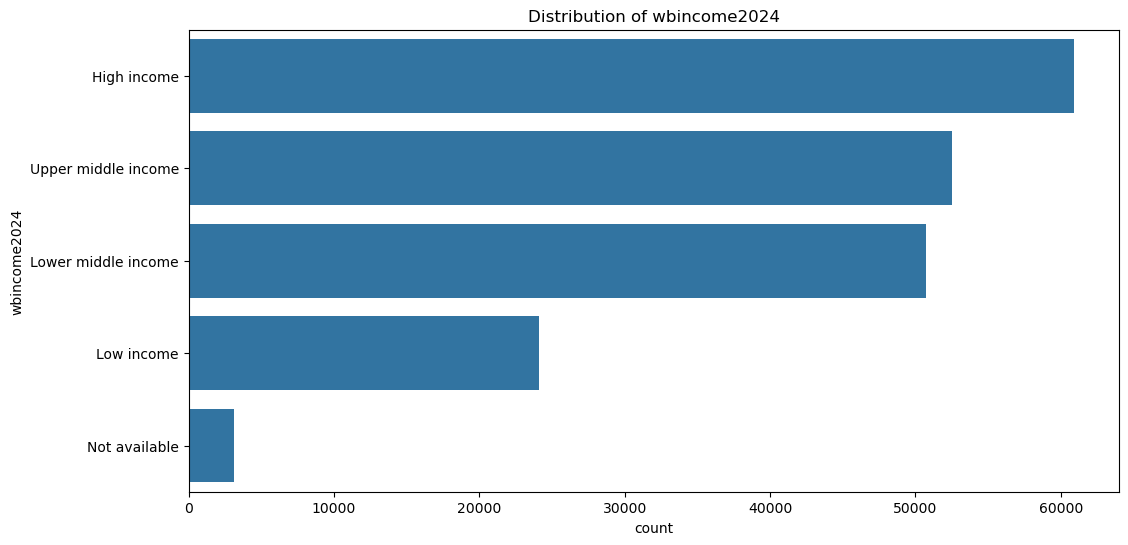

In [19]:
# Distribution of categorical columns
categorical_cols = ['indicator_name', 'whoreg6', 'wbincome2024']
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

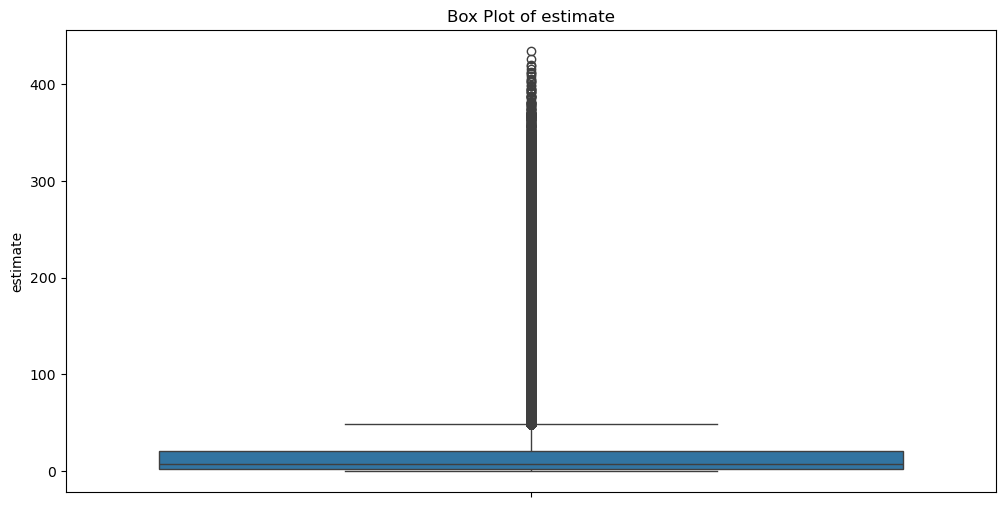

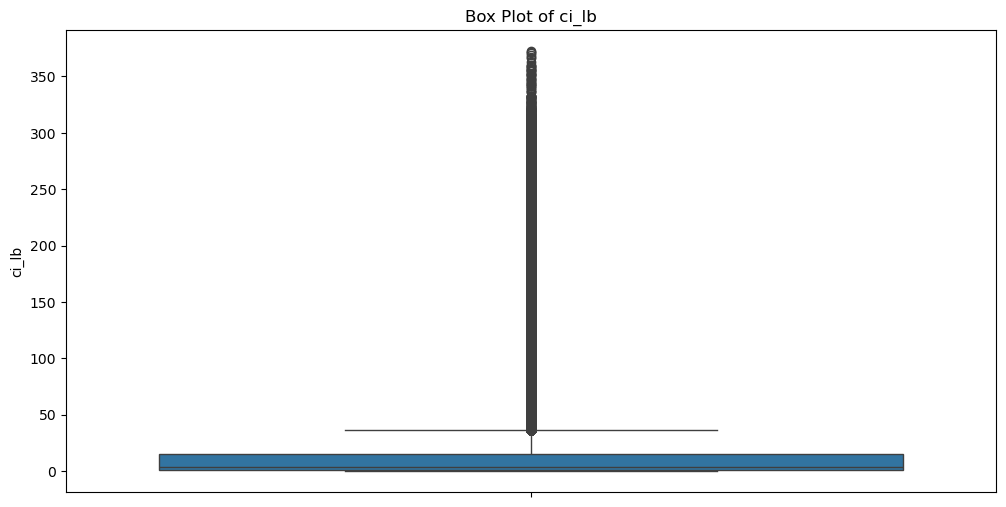

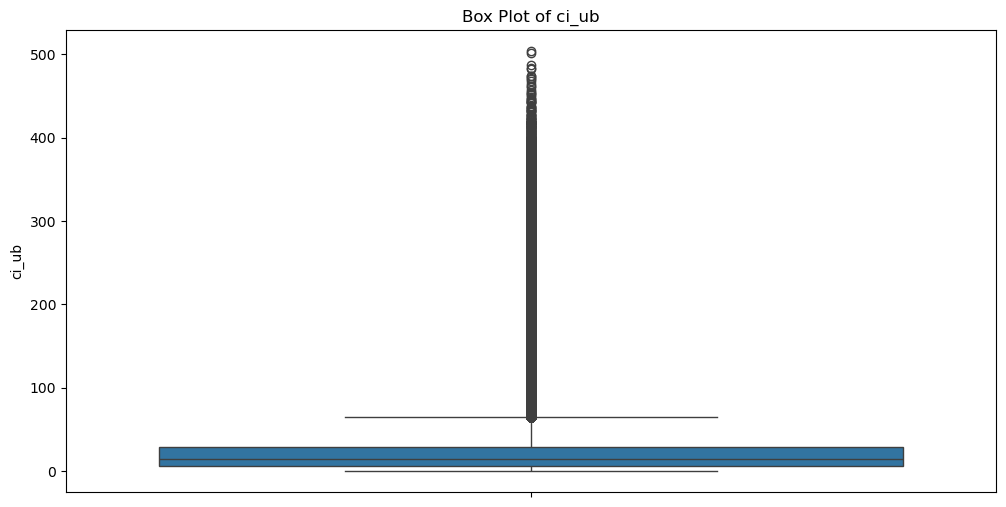

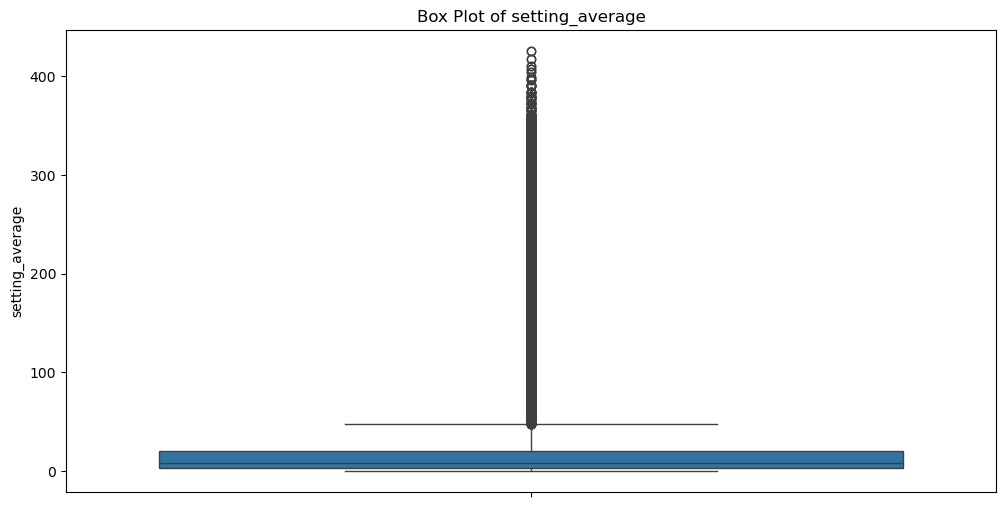

In [20]:
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

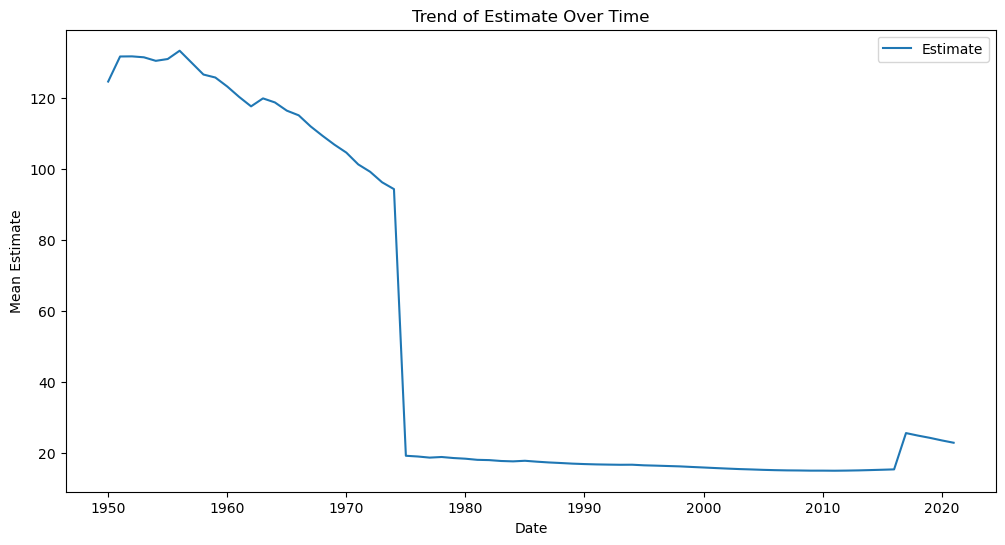

In [21]:
# Grouping by 'date' to observe trends
df_trend = df.groupby('date').agg({
    'estimate': 'mean',
    'ci_lb': 'mean',
    'ci_ub': 'mean',
    'setting_average': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trend, x='date', y='estimate', label='Estimate')
plt.title('Trend of Estimate Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Estimate')
plt.legend()
plt.show()

In [22]:
df

,setting,date,indicator_abbr,indicator_name,dimension,subgroup,estimate,ci_lb,ci_ub,flag,setting_average,iso3,indicator_scale,reference_subgroup,whoreg6,wbincome2024
0,Cyprus,1978,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,20.773371,19.174561,22.378071,Not available,18.653900,CYP,1000,1,European,High income
1,Iran (Islamic Republic of),1982,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,68.784279,63.160191,75.201180,Not available,67.208000,IRN,1000,1,Eastern Mediterranean,Upper middle income
2,Ghana,1961,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Female,113.473320,101.174393,127.645897,Not available,122.449089,GHA,1000,0,African,Lower middle income
3,Jordan,1972,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,59.913589,56.139622,63.786678,Not available,59.881680,JOR,1000,1,Eastern Mediterranean,Lower middle income
4,Jamaica,1976,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,39.717178,34.537769,45.213871,Not available,35.537338,JAM,1000,1,Americas,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196283,Angola,2003,NCD_BMI_PLUS2C_YEARS10_19,Obesity prevalence among children and adolesce...,Sex,Male,0.300000,0.000000,1.200000,BMI > +2 standard deviations above the median,0.500000,AGO,100,1,African,Lower middle income
196284,Honduras,2005,NCD_BMI_PLUS2C_YEARS10_19,Obesity prevalence among children and adolesce...,Sex,Male,4.000000,0.900000,9.900000,BMI > +2 standard deviations above the median,4.400000,HND,100,1,Americas,Lower middle income
196285,Singapore,1997,NCD_BMI_PLUS2C_YEARS10_19,Obesity prevalence among children and adolesce...,Sex,Male,6.800000,1.800000,15.900000,BMI > +2 standard deviations above the median,5.100000,SGP,100,1,Western Pacific,High income
196286,Suriname,2009,NCD_BMI_PLUS2C_YEARS10_19,Obesity prevalence among children and adolesce...,Sex,Female,8.600000,3.100000,17.100000,BMI > +2 standard deviations above the median,9.600000,SUR,100,0,Americas,Upper middle income


In [23]:
# Rename columns
df.rename(columns={
    'whoreg6': 'WHO Region',
    'wbincome2024': 'world Bank Income Group',
    'setting': 'country',
    'date': 'year'
}, inplace=True)

# Save the cleaned DataFrame to a new CSV file
df.to_csv('WHO.csv', index=False)

In [24]:
# Check unique values in the 'Country' column
unique_countries = df['country'].unique()

# Print the unique values
print(unique_countries)

['Cyprus' 'Iran (Islamic Republic of)' 'Ghana' 'Jordan' 'Jamaica'
 'Switzerland' 'Nepal' 'Ecuador' 'Zambia' 'Chad'
 'Venezuela (Bolivarian Republic of)' 'Latvia' 'Tajikistan' 'Mauritius'
 'Saint Vincent and the Grenadines' 'Madagascar' 'Singapore' 'Norway'
 'Peru' 'Armenia' 'Belgium' 'San Marino' 'Cabo Verde' 'Lebanon' 'Andorra'
 'Eswatini' 'Libya' 'Equatorial Guinea' 'Belize' 'Serbia' 'Botswana'
 'Finland' 'Zimbabwe' 'Syrian Arab Republic' 'Tonga' 'Austria' 'Mexico'
 'Australia' 'United States of America' 'Sierra Leone' 'Turkmenistan'
 'Slovakia' 'Bangladesh' 'Myanmar' 'Togo' 'Iraq' 'Guyana' 'Afghanistan'
 'The United Kingdom' 'Mauritania' 'Cuba' 'Guatemala' 'Brunei Darussalam'
 'Algeria' 'Qatar' 'Cambodia' 'Ireland' 'Greece' 'Solomon Islands' 'Oman'
 'Barbados' 'Congo' 'Tuvalu' 'Samoa' 'Benin' 'Angola' 'Canada' 'Comoros'
 'Israel' 'Colombia' 'Senegal' 'Romania' 'Czechia' 'Bahamas' 'Spain'
 'Kazakhstan' 'Costa Rica' 'Saudi Arabia' 'Republic of Korea' 'Denmark'
 'Grenada' 'Uruguay' 'Pa

In [25]:
df.columns

Index(['country', 'year', 'indicator_abbr', 'indicator_name', 'dimension',
       'subgroup', 'estimate', 'ci_lb', 'ci_ub', 'flag', 'setting_average',
       'iso3', 'indicator_scale', 'reference_subgroup', 'WHO Region',
       'world Bank Income Group'],
      dtype='object')

In [26]:
# Check unique values in the 'Country' column
unique_indicator_name = df['indicator_name'].unique()

# Print the unique values
print(unique_indicator_name)

['Infant mortality rate (deaths per 1000 live births)'
 'Under-five mortality rate (SDG 3.2.1) (per 1000 live births)'
 'Thinness prevalence among children and adolescents (crude estimate) (%) - 5-9 years'
 'Thinness prevalence among children and adolescents (crude estimate) (%) - 5-19 years'
 'Thinness prevalence among children and adolescents (crude estimate) (%) - 10-19 years'
 'Overweight prevalence among children and adolescents (crude estimate) (%) - 5-9 years'
 'Overweight prevalence among children and adolescents (crude estimate) (%) - 5-19 years'
 'Overweight prevalence among children and adolescents (crude estimate) (%) - 10-19 years'
 'Obesity prevalence among children and adolescents (crude estimate) (%) - 5-9 years'
 'Obesity prevalence among children and adolescents (crude estimate) (%) - 5-19 years'
 'Obesity prevalence among children and adolescents (crude estimate) (%) - 10-19 years']


In [27]:
# Check unique values in the 'Country' column
unique_year = df['year'].unique()

# Print the unique values
print(unique_year)

[1978 1982 1961 1972 1976 2021 1950 1956 2004 1971 1987 1955 1996 1992
 1968 2010 2008 1951 1977 1993 2001 1973 2009 1995 1975 2020 2006 1963
 1981 2013 2019 1984 1989 2003 1970 1960 1969 1974 2011 1964 2005 1985
 2007 1966 1983 2017 2016 1998 1990 1954 1986 1988 1991 1994 1962 2000
 1979 2014 1957 2002 2012 2015 2018 1999 1959 1980 1967 1958 1965 1953
 1997 1952]


In [28]:
df

,country,year,indicator_abbr,indicator_name,dimension,subgroup,estimate,ci_lb,ci_ub,flag,setting_average,iso3,indicator_scale,reference_subgroup,WHO Region,world Bank Income Group
0,Cyprus,1978,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,20.773371,19.174561,22.378071,Not available,18.653900,CYP,1000,1,European,High income
1,Iran (Islamic Republic of),1982,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,68.784279,63.160191,75.201180,Not available,67.208000,IRN,1000,1,Eastern Mediterranean,Upper middle income
2,Ghana,1961,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Female,113.473320,101.174393,127.645897,Not available,122.449089,GHA,1000,0,African,Lower middle income
3,Jordan,1972,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,59.913589,56.139622,63.786678,Not available,59.881680,JOR,1000,1,Eastern Mediterranean,Lower middle income
4,Jamaica,1976,MDG_0000000001,Infant mortality rate (deaths per 1000 live bi...,Sex,Male,39.717178,34.537769,45.213871,Not available,35.537338,JAM,1000,1,Americas,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196283,Angola,2003,NCD_BMI_PLUS2C_YEARS10_19,Obesity prevalence among children and adolesce...,Sex,Male,0.300000,0.000000,1.200000,BMI > +2 standard deviations above the median,0.500000,AGO,100,1,African,Lower middle income
196284,Honduras,2005,NCD_BMI_PLUS2C_YEARS10_19,Obesity prevalence among children and adolesce...,Sex,Male,4.000000,0.900000,9.900000,BMI > +2 standard deviations above the median,4.400000,HND,100,1,Americas,Lower middle income
196285,Singapore,1997,NCD_BMI_PLUS2C_YEARS10_19,Obesity prevalence among children and adolesce...,Sex,Male,6.800000,1.800000,15.900000,BMI > +2 standard deviations above the median,5.100000,SGP,100,1,Western Pacific,High income
196286,Suriname,2009,NCD_BMI_PLUS2C_YEARS10_19,Obesity prevalence among children and adolesce...,Sex,Female,8.600000,3.100000,17.100000,BMI > +2 standard deviations above the median,9.600000,SUR,100,0,Americas,Upper middle income


Data is properly cleaned and will be visualized in tableau